comparing the butenedial and ammonia reactions in bulk across the studies that were done

In [1]:
import os
notebook_wd = os.getcwd()
notebook_wd

'C:\\Users\\joh3146\\Documents\\pyrosolchem\\notebooks'

In [2]:
os.chdir(os.path.join(notebook_wd, '..'))

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from src.d00_utils.conf_utils import *
from src.d00_utils.data_utils import *
from src.d00_utils.plotting_utils import *

In [4]:
compounds, water = load_compounds()
compounds.keys()

dict_keys(['triethylene_glycol', 'hexaethylene_glycol', 'butenedial', 'pyrrolinone', 'diazepine', 'sodium_chloride', 'sodium_sulfate', 'sodium_bicarbonate', 'sodium_carbonate', 'ammonium_chloride', 'ammonium_hydroxide', 'ammonium_sulfate'])

first: butenedial with ammonium sulfate, no buffer. this was already cleaned up and performed

In [5]:
bd_as_expts = load_experiments(['bd_rxn_nh42so4_vial'])
bd_as_expts.keys()

dict_keys(['bd_rxn_nh42so4_vial'])

In [6]:
bd_as_file_name = bd_as_expts['bd_rxn_nh42so4_vial']['paths']['processed_data']
df_bd_as = import_ms_data(bd_as_file_name, 'bd_rxn_nh42so4_vial')
df_bd_as.head()

,solution_name,mz84_mz283,mz85_mz283,hrs
0,bd07hg20as03_002,0.040180,0.033534,17.916667
1,bd07hg20as03_002,0.035870,0.044183,18.083333
2,bd07hg20as03_006,0.021963,0.016611,16.733333
3,bd07hg20as03_007,0.002801,0.015251,1.133333
4,bd07hg20as03_008,0.004552,0.011642,2.483333


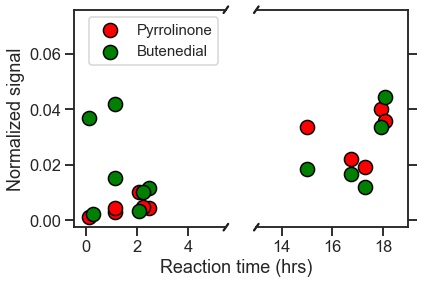

In [7]:
from src.d05_reporting.plot_ms_data import *

series_labels = [['Pyrrolinone', 'Butenedial']]
series_colors = [['red', 'green']]

ax = plot_ms_data_with_break(experiments_dict=bd_as_expts, x_col_name='hrs', 
                                     y_col_names=['mz84_mz283', 'mz85_mz283'],
                                     series_labels=series_labels, series_colors=series_colors,
                                     x_label='Reaction time (hrs)', y_label='Normalized signal',
                                     left_xlims=[-0.5, 5.5], right_xlims=[13, 19],
                                     series_title=None, save_fig=True)

now consider ammonium hydroxide experiments

In [8]:
bd_ah_expts = load_experiments(['bd_rxn_nh4oh_vial'])
bd_ah_expts.keys()

dict_keys(['bd_rxn_nh4oh_vial'])

In [9]:
bd_ah_file_name = bd_ah_expts['bd_rxn_nh4oh_vial']['paths']['raw_data']
df_bd_ah = import_ms_data(bd_ah_file_name)
df_bd_ah.columns

Index(['path', 'p283', 'p84', 'p85', 'p112', 'p122', 'p149', 'p150', 'p168',
       'file', 'date', 'n84', 'n85', 'vial', 'nhx', 'Unnamed: 15'],
      dtype='object')

explore the dataset

In [10]:
nhx = df_bd_ah.nhx.unique()
nhx = np.sort(nhx)
nhx

array([0.16, 0.32, 0.65])

Text(0, 0.5, 'normalized signal')

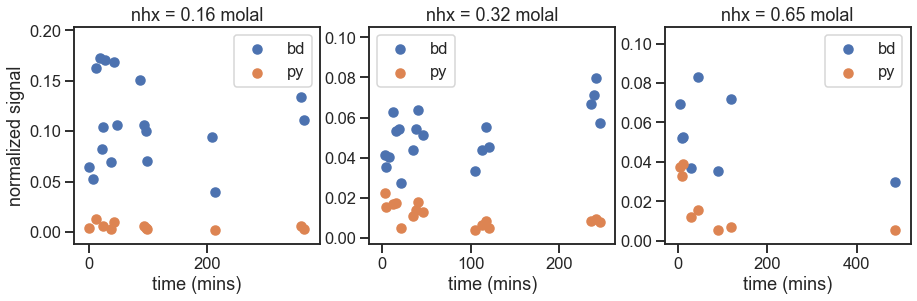

In [11]:
fig, ax = plt.subplots(1, len(nhx), figsize=(15,4))

for tick in range(len(nhx)):
    df_to_plot = df_bd_ah[df_bd_ah.nhx == nhx[tick]]
    ax[tick].scatter(df_to_plot.vial, df_to_plot.n85, label='bd')
    ax[tick].scatter(df_to_plot.vial, df_to_plot.n84, label='py')
    title_string = 'nhx = ' + str(nhx[tick]) + ' molal'
    ax[tick].set_title(title_string)
    ax[tick].legend()
    ax[tick].set_xlabel('time (mins)')

ax[0].set_ylabel('normalized signal')

In [12]:
df_bd_ah['n112'] = df_bd_ah['p112'] / df_bd_ah['p283']
df_bd_ah['n122'] = df_bd_ah['p122'] / df_bd_ah['p283']
df_bd_ah['n149'] = df_bd_ah['p149'] / df_bd_ah['p283']
df_bd_ah['n150'] = df_bd_ah['p150'] / df_bd_ah['p283']
df_bd_ah['n168'] = df_bd_ah['p168'] / df_bd_ah['p283']

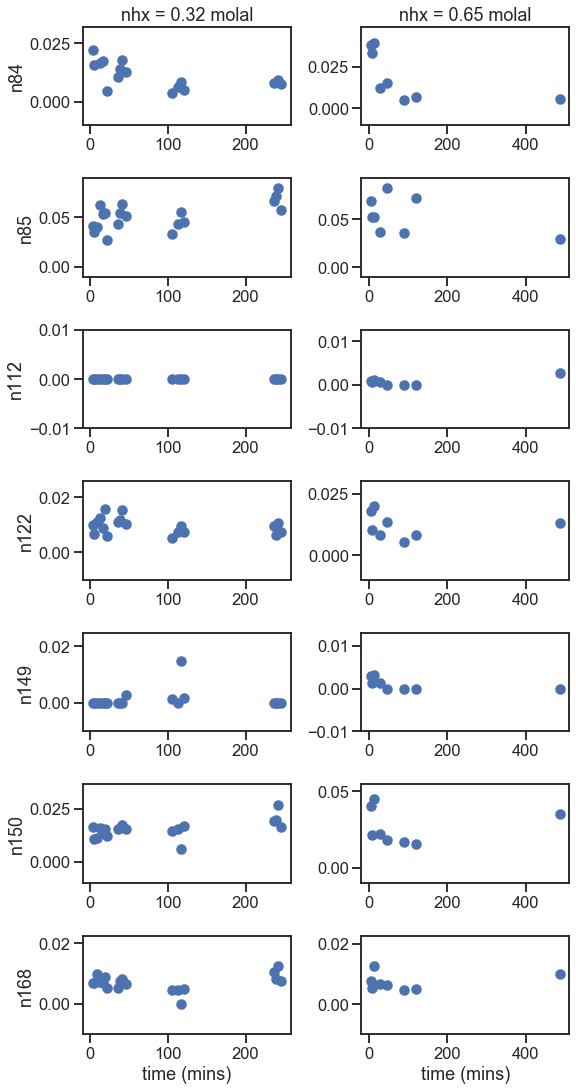

In [13]:
nhx_to_plot = [0.32, 0.65]
species_to_plot = ['n84', 'n85', 'n112', 'n122', 'n149', 'n150', 'n168']
num_species = len(species_to_plot)

fig, ax = plt.subplots(num_species, 2, figsize=(8, 15))
fig.tight_layout()

for tock in range(2):
    df_to_plot = df_bd_ah[df_bd_ah.nhx == nhx_to_plot[tock]]

    for tick in range(num_species):
        species = species_to_plot[tick]
        maxval = np.max(df_to_plot[species])
        ax[tick, tock].scatter(df_to_plot.vial, df_to_plot[species], label=species)
        title_string = 'nhx = ' + str(nhx_to_plot[tock]) + ' molal'
        ax[tick, 0].set_ylabel(species)
        ax[tick, tock].set_ylim(ymin=-0.01, ymax=maxval+0.01)

    ax[0, tock].set_title(title_string)
    ax[num_species-1, tock].set_xlabel('time (mins)')

now want to look at the measurements taken last two weeks, with buffered solution

In [14]:
bd_as_buff_expts = load_experiments(['bd_rxn_nh4cl_buffered_vial'])
bd_as_buff_expts.keys()

dict_keys(['bd_rxn_nh4cl_buffered_vial'])

In [15]:
bd_as_buff_file_name = bd_as_buff_expts['bd_rxn_nh4cl_buffered_vial']['paths']['raw_data']
df_bd_as_buff = import_ms_data(bd_as_buff_file_name)
df_bd_as_buff.columns

Index(['date', 'data', 'data_start_time', 'chrom', 'sol_id', 'rxn_start_time',
       'peak_record_time', 'rxn_time', 'mz84', 'mz85', 'mz112', 'mz122',
       'mz132', 'mz149', 'mz150', 'mz168', 'mz283', 'notes'],
      dtype='object')

In [16]:
df_bd_as_buff.drop([0, 39], inplace=True)

In [17]:
df_bd_as_buff['mz84_mz283'] = df_bd_as_buff['mz84'] / df_bd_as_buff['mz283']
df_bd_as_buff['mz85_mz283'] = df_bd_as_buff['mz85'] / df_bd_as_buff['mz283']
df_bd_as_buff['mz112_mz283'] = df_bd_as_buff['mz112'] / df_bd_as_buff['mz283']
df_bd_as_buff['mz122_mz283'] = df_bd_as_buff['mz122'] / df_bd_as_buff['mz283']
df_bd_as_buff['mz132_mz283'] = df_bd_as_buff['mz132'] / df_bd_as_buff['mz283']
df_bd_as_buff['mz149_mz283'] = df_bd_as_buff['mz149'] / df_bd_as_buff['mz283']
df_bd_as_buff['mz150_mz283'] = df_bd_as_buff['mz150'] / df_bd_as_buff['mz283']
df_bd_as_buff['mz168_mz283'] = df_bd_as_buff['mz168'] / df_bd_as_buff['mz283']

In [18]:
df_bd_as_buff['mins'] = pd.to_timedelta(df_bd_as_buff.rxn_time).dt.total_seconds()/60
df_bd_as_buff['mins'] = df_bd_as_buff['mins'].astype(int)
df_bd_as_buff['mins'].head()

1     2
2     5
3     7
4    11
5    14
Name: mins, dtype: int32

In [19]:
expt_names = ['bd_as_001', 'bd_as_002']
nh3 = [0.1, 0.5]

Text(0, 0.5, 'normalized signal')

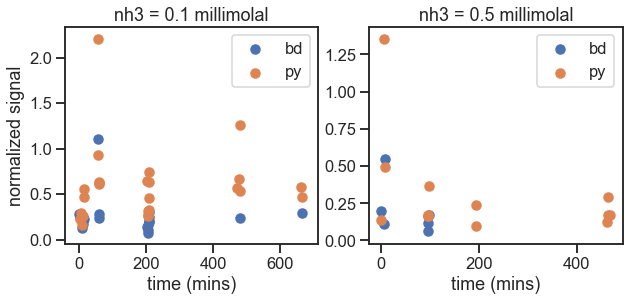

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

for tick in range(2):
    expt_name = expt_names[tick]
    df_to_plot = df_bd_as_buff[df_bd_as_buff.sol_id == expt_name]
    ax[tick].scatter(df_to_plot.mins[df_to_plot.mz85_mz283 > 0], df_to_plot.mz85_mz283[df_to_plot.mz85_mz283 > 0], 
                     label='bd')
    ax[tick].scatter(df_to_plot.mins[df_to_plot.mz84_mz283 > 0], df_to_plot.mz84_mz283[df_to_plot.mz84_mz283 > 0], 
                     label='py')
    title_string = 'nh3 = ' + str(nh3[tick]) + ' millimolal'
    ax[tick].set_title(title_string)
    ax[tick].legend()
    ax[tick].set_xlabel('time (mins)')

ax[0].set_ylabel('normalized signal')

In [47]:
ac_expt_names = ['bd_ac_001', 'bd_ac_002']
species_names_to_plot = ['mz84_mz283', 'mz85_mz283', 'mz112_mz283', 'mz122_mz283', 'mz132_mz283', 'mz149_mz283', 'mz150_mz283', 'mz168_mz283']
num_species = len(species_names_to_plot)
nh3 = [0.1, 3]

C:\Users\joh3146\AppData\Local\Continuum\anaconda3\envs\dropletenv\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  del sys.path[0]


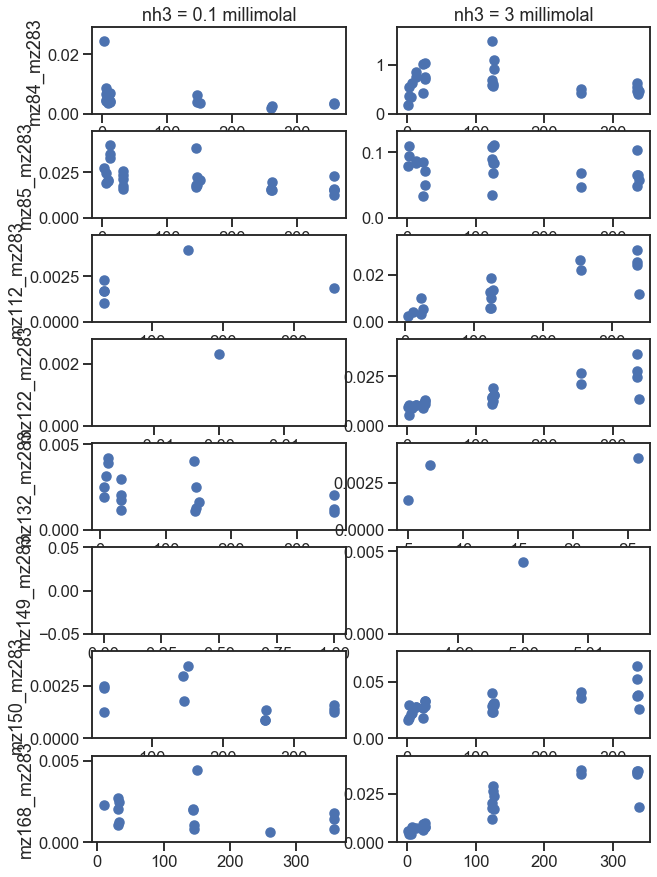

In [22]:
fig, ax = plt.subplots(num_species, 2, figsize=(10,15))

for tick in range(num_species):
    df_to_plot_001 = df_bd_as_buff[df_bd_as_buff.sol_id == 'bd_ac_001']
    df_to_plot_002 = df_bd_as_buff[df_bd_as_buff.sol_id == 'bd_ac_002']
    
    species = species_names_to_plot[tick]
    ax[tick, 0].scatter(df_to_plot_001.mins[df_to_plot_001[species] > 0], df_to_plot_001[species][df_to_plot_001[species] > 0],
                        label=species)
    ax[tick, 1].scatter(df_to_plot_002.mins[df_to_plot_002[species] > 0], df_to_plot_002[species][df_to_plot_002[species] > 0],
                        label=species)
    ax[tick, 0].set_ylabel(species)
    ax[tick, 0].set_ylim(ymin=0, ymax=np.nanmax(df_to_plot_001[species])*1.2)
    ax[tick, 1].set_ylim(ymin=0, ymax=np.nanmax(df_to_plot_002[species])*1.2)

for tick in range(len(nh3)):    
    title_string = 'nh3 = ' + str(nh3[tick]) + ' millimolal'
    ax[0, tick].set_title(title_string)
    ax[5, tick].set_xlabel('time (mins)')

looks like 112, 122, 150, 168 all have the same shape?
look at correlation.

In [23]:
species_names_to_correlate = ['mz112_mz283', 'mz122_mz283', 'mz150_mz283', 'mz168_mz283']
num_species = len(species_names_to_correlate)

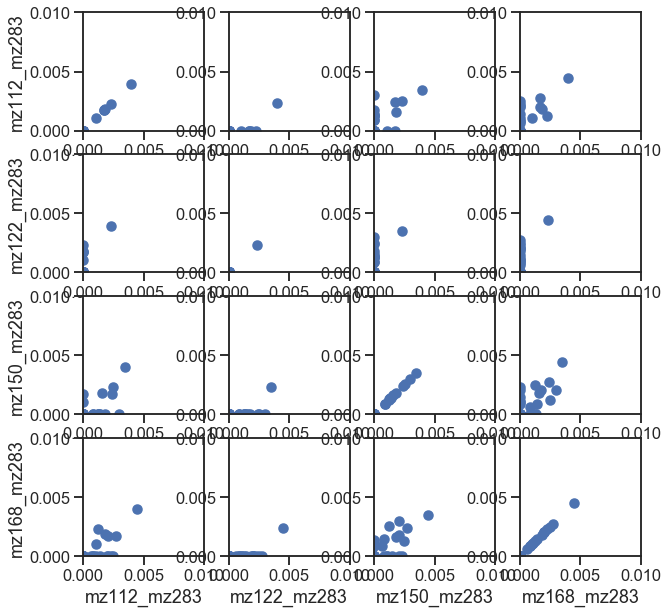

In [24]:
fig, ax = plt.subplots(num_species, num_species, figsize=(10,10))

df_to_plot = df_bd_as_buff[df_bd_as_buff.sol_id == 'bd_ac_001']
for tick in range(num_species):
    y_species = species_names_to_correlate[tick]
    for tock in range(num_species):
        x_species = species_names_to_correlate[tock]
        
        ax[tick, tock].scatter(df_to_plot[y_species], df_to_plot[x_species],
                               label=species)
        ax[tick, tock].set_ylim(ymin=0,ymax=0.01)
        ax[tick, tock].set_xlim(xmin=0,xmax=0.01)
        
        if tick==3:
            ax[tick, tock].set_xlabel(x_species)
    
    ax[tick, 0].set_ylabel(y_species)

# for tick in range(len(nh3)):    
#     title_string = 'nh3 = ' + str(nh3[tick]) + ' millimolal'
#     ax[0, tick].set_title(title_string)
#     ax[5, tick].set_xlabel('time (mins)')

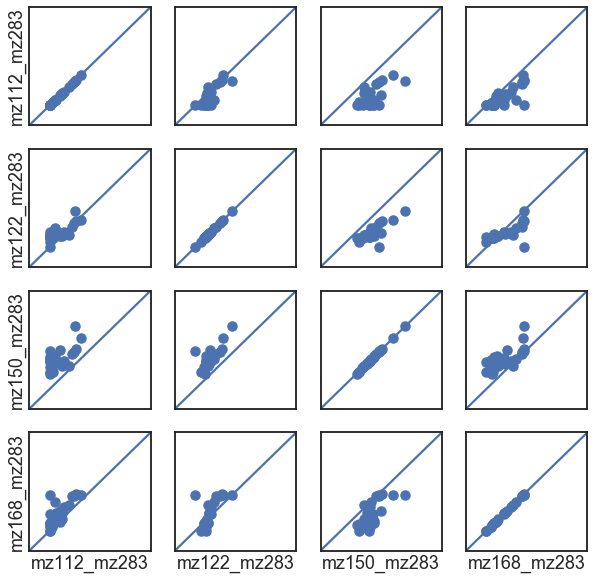

In [25]:
fig, ax = plt.subplots(num_species, num_species, figsize=(10,10))

df_to_plot = df_bd_as_buff[df_bd_as_buff.sol_id == 'bd_ac_002']
for tick in range(num_species):
    y_species = species_names_to_correlate[tick]
    for tock in range(num_species):
        x_species = species_names_to_correlate[tock]
        
        ax[tick, tock].scatter(df_to_plot[x_species], df_to_plot[y_species],
                               label=species)
        ax[tick, tock].set_ylim(ymin=-0.02,ymax=0.1)
        ax[tick, tock].set_xlim(xmin=-0.02,xmax=0.1)
        ax[tick, tock].set_xticks([]) 
        ax[tick, tock].set_yticks([])
        ax[tick, tock].plot(np.linspace(-1, 1, 50), np.linspace(-1, 1, 50))
        
        if tick==3:
            ax[tick, tock].set_xlabel(x_species)
    
    ax[tick, 0].set_ylabel(y_species)

# for tick in range(len(nh3)):    
#     title_string = 'nh3 = ' + str(nh3[tick]) + ' millimolal'
#     ax[0, tick].set_title(title_string)
#     ax[5, tick].set_xlabel('time (mins)')

look at data from the gas experiments

In [26]:
bd_nh3g_expts = load_experiments(['bd_rxn_nh3g_droplet'])
bd_nh3g_expts.keys()

dict_keys(['bd_rxn_nh3g_droplet'])

In [27]:
bd_nh3g_file_name = bd_nh3g_expts['bd_rxn_nh3g_droplet']['paths']['raw_data']
df_bd_nh3g = import_ms_data(bd_nh3g_file_name)
df_bd_nh3g.columns

Index(['Unnamed: 0', 'p149', 'p283', 'p84', 'p85', 'p112', 'p122', 'p150',
       'p168', 'trapped', 'nh3', 'signal_84', 'signal_85', 'signal_149',
       'solution', 'np84', 'np85', 'np149', 'nominal_nh3_mM'],
      dtype='object')

In [28]:
df_bd_nh3g['n112'] = df_bd_nh3g['p112'] / df_bd_nh3g['p283']
df_bd_nh3g['n122'] = df_bd_nh3g['p122'] / df_bd_nh3g['p283']
df_bd_nh3g['n149'] = df_bd_nh3g['p149'] / df_bd_nh3g['p283']
df_bd_nh3g['n150'] = df_bd_nh3g['p150'] / df_bd_nh3g['p283']
df_bd_nh3g['n168'] = df_bd_nh3g['p168'] / df_bd_nh3g['p283']
df_bd_nh3g['n84'] = df_bd_nh3g['np84']
df_bd_nh3g['n85'] = df_bd_nh3g['np85']
df_bd_nh3g['n149'] = df_bd_nh3g['np149']

df_bd_nh3g.columns

Index(['Unnamed: 0', 'p149', 'p283', 'p84', 'p85', 'p112', 'p122', 'p150',
       'p168', 'trapped', 'nh3', 'signal_84', 'signal_85', 'signal_149',
       'solution', 'np84', 'np85', 'np149', 'nominal_nh3_mM', 'n112', 'n122',
       'n149', 'n150', 'n168', 'n84', 'n85'],
      dtype='object')

In [29]:
df_bd_nh3g.nominal_nh3_mM.unique()

array([0.00e+00, 1.45e+03, 1.45e+02, 1.45e+01, 2.90e+00, 5.80e-01])

Text(0.5, 103.49999999999989, 'time (mins)')

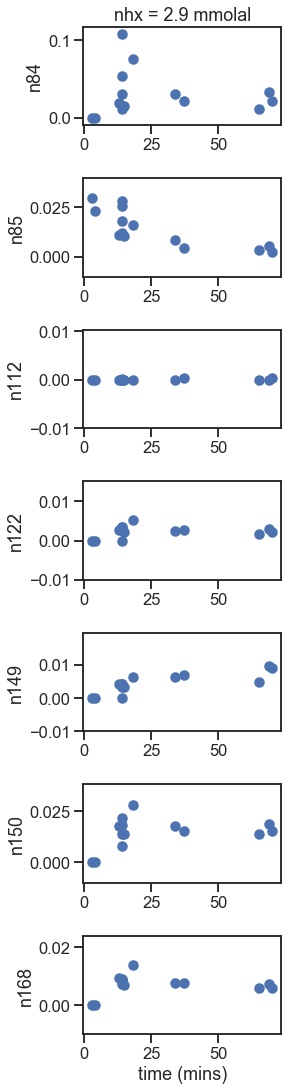

In [30]:
nh3_to_plot = 2.9
spec_to_plot = ['n84', 'n85', 'n112', 'n122', 'n149', 'n150', 'n168']
num_species = len(spec_to_plot)

fig, ax = plt.subplots(num_species, 1, figsize=(4, 15))
fig.tight_layout()

df_to_plot = df_bd_nh3g[df_bd_nh3g.nominal_nh3_mM == nh3_to_plot]

for tick in range(num_species):
    species = spec_to_plot[tick]
    maxval = np.max(df_to_plot[species])
    ax[tick].scatter(df_to_plot.trapped, df_to_plot[species], label=species)
    title_string = 'nhx = ' + str(nh3_to_plot) + ' mmolal'
    ax[tick].set_ylabel(species)
    ax[tick].set_ylim(ymin=-0.01, ymax=maxval+0.01)

ax[0].set_title(title_string)
ax[num_species-1].set_xlabel('time (mins)')

now, repeat the same thing with the ammonium sulfate experiments (probably ph~3?)

In [31]:
bd_as_expts = load_experiments(['bd_rxn_nh42so4_droplet'])
bd_as_expts.keys()

dict_keys(['bd_rxn_nh42so4_droplet'])

In [32]:
bd_as_file_name = bd_as_expts['bd_rxn_nh42so4_droplet']['paths']['raw_data']
df_bd_as = import_ms_data(bd_as_file_name)
df_bd_as.columns

Index(['date', 'file', 'chrom', 'dc_trap', 'mfc', 'src1', 'src2', 'signal',
       'vialstart', 'trapstart', 'eject', 'vial', 'trapped', 'rh', 'comp',
       'wt_frac', 'nh3_bubbler', 'p84', 'p85', 'p112', 'p122', 'p149', 'p150',
       'p168', 'p283', 'note', 'dc_spring', 'ac_spring_f1', 'ac_spring_a1',
       'ac_spring_f2', 'ac_spring_a2', 'dc_spring_after', 'ac_spring_f1_after',
       'ac_spring_a1_after', 'ac_spring_f2_after', 'ac_spring_a2_after',
       'data_path', 'code', 'comptype', 'compnum', 'p84_j', 'p85_j', 'p283_j',
       'n84_j', 'n84', 'n85_j', 'n85', 'bad_data', 'nh3_vial', 'naoh_vial'],
      dtype='object')

In [33]:
df_bd_as['n112'] = df_bd_as['p112'] / df_bd_as['p283']
df_bd_as['n122'] = df_bd_as['p122'] / df_bd_as['p283']
df_bd_as['n149'] = df_bd_as['p149'] / df_bd_as['p283']
df_bd_as['n150'] = df_bd_as['p150'] / df_bd_as['p283']
df_bd_as['n149'] = df_bd_as['p149'] / df_bd_as['p283']
df_bd_as['n168'] = df_bd_as['p168'] / df_bd_as['p283']

df_bd_as.columns

Index(['date', 'file', 'chrom', 'dc_trap', 'mfc', 'src1', 'src2', 'signal',
       'vialstart', 'trapstart', 'eject', 'vial', 'trapped', 'rh', 'comp',
       'wt_frac', 'nh3_bubbler', 'p84', 'p85', 'p112', 'p122', 'p149', 'p150',
       'p168', 'p283', 'note', 'dc_spring', 'ac_spring_f1', 'ac_spring_a1',
       'ac_spring_f2', 'ac_spring_a2', 'dc_spring_after', 'ac_spring_f1_after',
       'ac_spring_a1_after', 'ac_spring_f2_after', 'ac_spring_a2_after',
       'data_path', 'code', 'comptype', 'compnum', 'p84_j', 'p85_j', 'p283_j',
       'n84_j', 'n84', 'n85_j', 'n85', 'bad_data', 'nh3_vial', 'naoh_vial',
       'n112', 'n122', 'n149', 'n150', 'n168'],
      dtype='object')

In [34]:
df_bd_as['n150'].unique()

array([       nan, 0.        , 0.00453354, 0.00393437, 0.00312975,
       0.00318244, 0.00489265, 0.00363537, 0.00273091, 0.00380273])

Text(0.5, 103.49999999999989, 'time (hrs)')

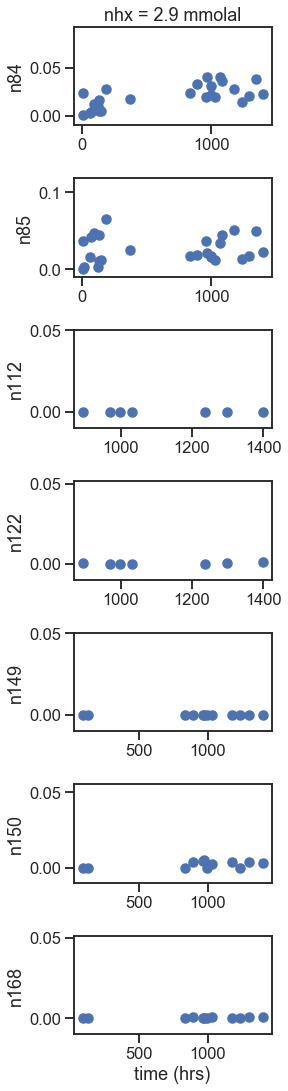

In [35]:
spec_to_plot = ['n84', 'n85', 'n112', 'n122', 'n149', 'n150', 'n168']
num_species = len(spec_to_plot)

fig, ax = plt.subplots(num_species, 1, figsize=(4, 15))
fig.tight_layout()

df_to_plot = df_bd_as.query('trapped<10 and comptype=="bd07hg20as03"')

for tick in range(num_species):
    species = spec_to_plot[tick]
#     maxval = np.nanmax(df_to_plot[species])
    ax[tick].scatter(df_to_plot.vial, df_to_plot[species], label=species)
    title_string = 'nhx = ' + str(nh3_to_plot) + ' mmolal'
    ax[tick].set_ylabel(species)
    ax[tick].set_ylim(ymin=-0.01)

ax[0].set_title(title_string)
ax[num_species-1].set_xlabel('time (hrs)')



C:\Users\joh3146\AppData\Local\Continuum\anaconda3\envs\dropletenv\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 0, 'time (mins)')

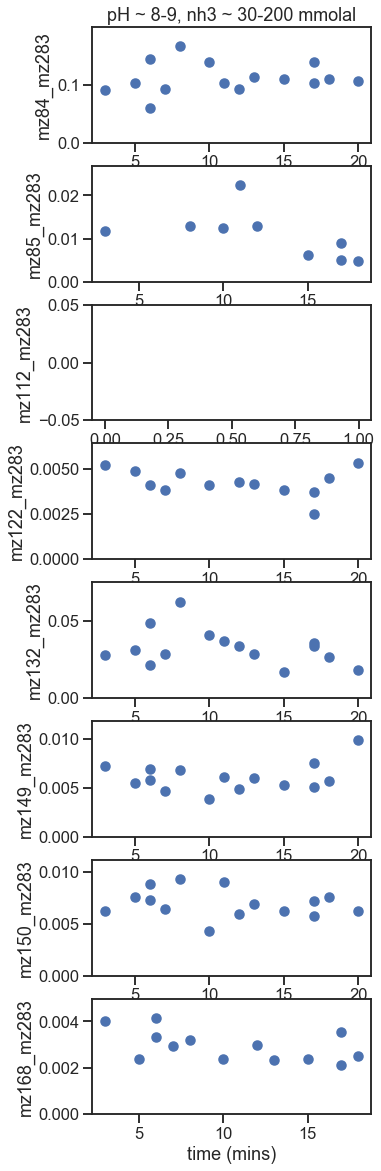

In [49]:
num_species = len(species_names_to_plot)
fig, ax = plt.subplots(num_species, 1, figsize=(5,20))

for tick in range(num_species):
    df_to_plot_001 = df_bd_as_buff[df_bd_as_buff.sol_id == 'bd_9.2_ah_001']
    
    species = species_names_to_plot[tick]
    ax[tick].scatter(df_to_plot_001.mins[df_to_plot_001[species] > 0], df_to_plot_001[species][df_to_plot_001[species] > 0],
                        label=species)
    ax[tick].set_ylabel(species)
    ax[tick].set_ylim(ymin=0, ymax=np.max(df_to_plot_001[species])*1.2)
    
title_string = 'pH ~ 8-9, nh3 ~ 30-200 mmolal'
ax[0].set_title(title_string)
ax[7].set_xlabel('time (mins)')

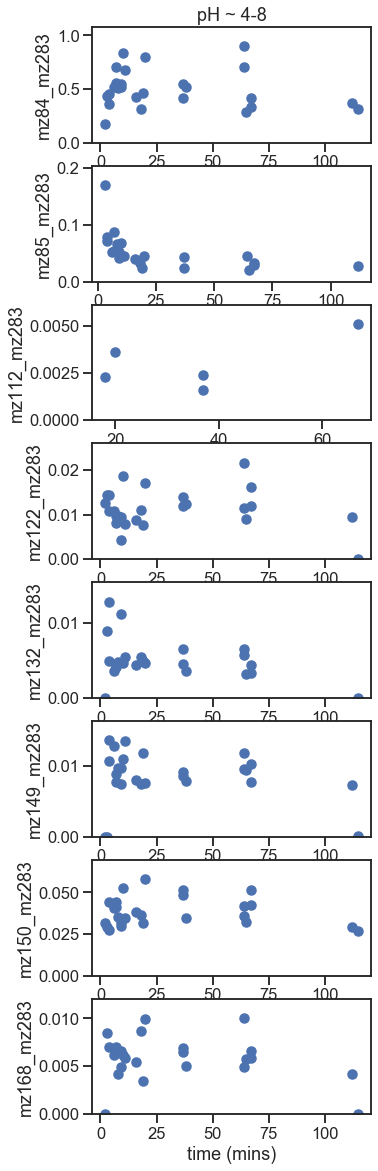

In [55]:
fig, ax = plt.subplots(num_species, 1, figsize=(5,20))

for tick in range(num_species):
    df_to_plot_001 = df_bd_as_buff[(df_bd_as_buff.sol_id == 'bd_9.2_as_003') | (df_bd_as_buff.sol_id == 'bd_9.2_as_001')]
    
    species = species_names_to_plot[tick]
    ax[tick].scatter(df_to_plot_001.mins[df_to_plot_001[species] > 0], df_to_plot_001[species][df_to_plot_001[species] > 0],
                        label=species)
    ax[tick].set_ylabel(species)
    ax[tick].set_ylim(ymin=0, ymax=np.max(df_to_plot_001[species])*1.2)

for tick in range(len(nh3)):    
    title_string = 'pH ~ 4-8'
    ax[0].set_title(title_string)
    ax[7].set_xlabel('time (mins)')

C:\Users\joh3146\AppData\Local\Continuum\anaconda3\envs\dropletenv\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  # Remove the CWD from sys.path while we load stuff.


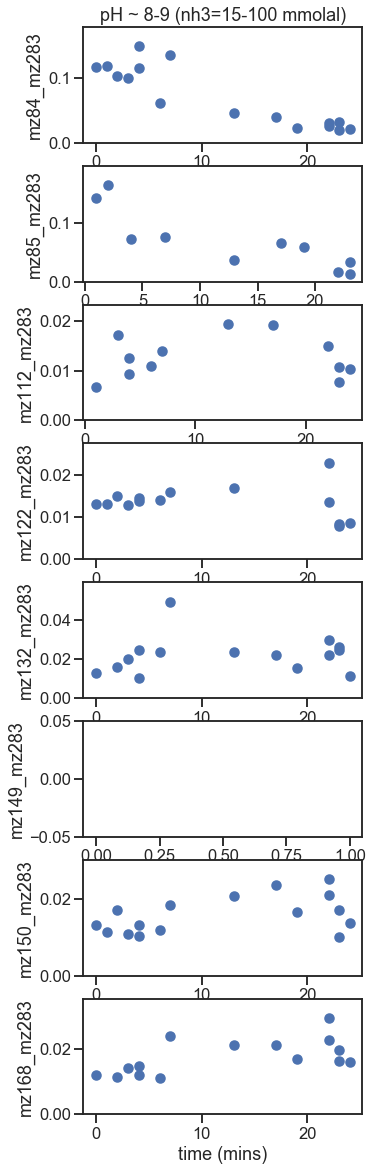

In [57]:
fig, ax = plt.subplots(num_species, 1, figsize=(5,20))

for tick in range(num_species):
    df_to_plot_001 = df_bd_as_buff[(df_bd_as_buff.sol_id == 'bd_9.2_as_002')]
    
    species = species_names_to_plot[tick]
    ax[tick].scatter(df_to_plot_001.mins[df_to_plot_001[species] > 0], df_to_plot_001[species][df_to_plot_001[species] > 0],
                        label=species)
    ax[tick].set_ylabel(species)
    ax[tick].set_ylim(ymin=0, ymax=np.max(df_to_plot_001[species])*1.2)

for tick in range(len(nh3)):    
    title_string = 'pH ~ 8-9 (nh3=15-100 mmolal)'
    ax[0].set_title(title_string)
    ax[7].set_xlabel('time (mins)')